In [1]:
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.metrics

In [2]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)

# Problem 1: Logistic Regression for Image Classification of Handwritten Digits

In [3]:
DATA_DIR = 'data_digits_8_vs_9_noisy/'
x_tr_M = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), delimiter=',', skiprows=1)
x_va_N = np.loadtxt(os.path.join(DATA_DIR, 'x_valid.csv'), delimiter=',', skiprows=1)
x_te_K = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), delimiter=',', skiprows=1)

M_shape = x_tr_M.shape
N_shape = x_va_N.shape
K_shape = x_te_K.shape

N = N_shape[0]
M = M_shape[0]
K = K_shape[0]

y_tr_M = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), delimiter=',', skiprows=1)
y_va_N = np.loadtxt(os.path.join(DATA_DIR, 'y_valid.csv'), delimiter=',', skiprows=1)

## 1A : Dataset Exploration

### Table 1A

In [6]:
from tabulate import tabulate

positive_y_tr_M = np.count_nonzero(y_tr_M == 1)
positive_y_va_N = np.count_nonzero(y_va_N == 1)

table = [['total number of examples', M, N],
        ['number of positive examples', positive_y_tr_M, positive_y_va_N],
        ['fraction of positive examples', np.around(positive_y_tr_M/M, 3), np.around(positive_y_va_N/N, 3)]]

print(tabulate(table, headers=['', 'train', 'valid']))

                                 train     valid
-----------------------------  -------  --------
total number of examples        9817    1983
number of positive examples     4913    1036
fraction of positive examples      0.5     0.522


## 1B : Assess Loss and Error vs. Training Iterations

In [12]:
iterations = [i+1 for i in range(40)]
print(iterations)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [24]:
def calc_mean_binary_cross_entropy_from_probas(ytrue_N, yproba1_N):
    ''' Compute mean binary cross entropy
    
    Args
    ----
    ytrue_N : 1D array, size (n_examples,) = (N,)
    yproba1_N : 1D array, size (n_examples,) = (N,)
    
    Returns
    -------
    mean_bce : float
        mean binary cross entropy across all N examples
    '''
    return sklearn.metrics.log_loss(ytrue_N, yproba1_N, labels=[0,1]) / np.log(2.0)

In [21]:
lr_1B = sklearn.linear_model.LogisticRegression(C=1000000., solver='lbfgs', max_iter=50)
lr_1B.fit(x_tr_M, y_tr_M)

#print(lr_1B.coef_)
print(lr_1B.intercept_)

[26.43673725]


/Users/kamibrumi/opt/miniconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
tr_bce_list = list()
va_bce_list = list()

tr_err_list = list()
va_err_list = list()

for i in iterations:
    lr_1B = sklearn.linear_model.LogisticRegression(C=1000000., solver='lbfgs', max_iter=i)
    lr_1B.fit(x_tr_M, y_tr_M)
    
    yproba1_tr_M = lr_1B.predict_proba(x_tr_M)[:,1] # The probability of predicting class 1 on the training set
    yproba1_va_N = lr_1B.predict_proba(x_va_N)[:,1] # The probability of predicting class 1 on the validation set
    
    tr_err_list.append(sklearn.metrics.zero_one_loss(y_tr_M, yproba1_tr_M >= 0.5)) # Error rate for training set. 
    va_err_list.append(sklearn.metrics.zero_one_loss(y_va_N, yproba1_va_N >= 0.5)) # Error rate for validation set. 
    
    # TODO: using the calc_mean_binary_cross_entropy_from_probas() function from above:
    # Part c: calculate the binary cross entropy (bce) on the training set
    # Part d: calculate the binary cross entropy (bce) on the validation set
    my_tr_bce= calc_mean_binary_cross_entropy_from_probas(y_tr_M, yproba1_tr_M) # Part c
    my_va_bce= calc_mean_binary_cross_entropy_from_probas(y_va_N, yproba1_va_N) # Part d
    # Save bce for future selection on Models.
    tr_bce_list.append(my_tr_bce) 
    va_bce_list.append(my_va_bce)

/Users/kamibrumi/opt/miniconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kamibrumi/opt/miniconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/kamibrumi/opt/miniconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kamibrumi/opt/miniconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

/Users/kamibrumi/opt/miniconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kamibrumi/opt/miniconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

In [27]:
print(tr_bce_list)
print("---")
print(va_bce_list)
print("---")
print(tr_err_list)
print("---")
print(va_err_list)

[0.6667464106343706, 0.2605833305113473, 0.2504387390482576, 0.21775065987406347, 0.18881562783516903, 0.14449930251786802, 0.11512214484577628, 0.0962822830114987, 0.08767252024795796, 0.07679458411203695, 0.07275847860239922, 0.0692380980862121, 0.06669085400061064, 0.0658328921847986, 0.05911528741852376, 0.05262095310969274, 0.04789248333558716, 0.046294352919198825, 0.04314450006846582, 0.040640329008185115, 0.038832838067245024, 0.03655182501946916, 0.03546135897538933, 0.03505129394360085, 0.034243260233968446, 0.032597417771430576, 0.030927066971545354, 0.02974018411661699, 0.02737851283532776, 0.02606484098425578, 0.022950775299141406, 0.022149559207117912, 0.020999138832102762, 0.020702185233638145, 0.020245751584193422, 0.01956291968919777, 0.0181508022130684, 0.016471217687434658, 0.015450345935032783, 0.014675195627735489]
---
[0.7201231997615134, 0.2807018561705377, 0.26967213975454696, 0.23502275968143016, 0.2049216831807461, 0.15905834384280712, 0.13425687981169857, 0.1

### Figure 1B

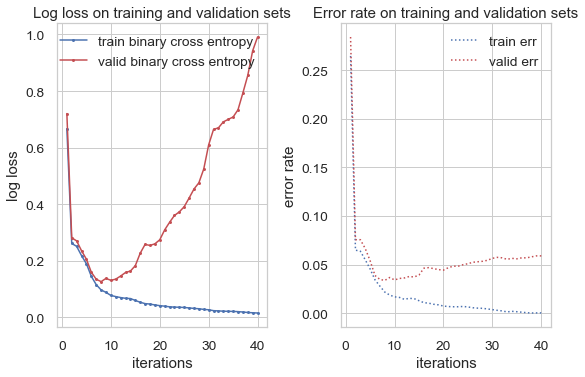

In [36]:
plt.subplot(1, 2, 1)
plt.plot(iterations, tr_bce_list, 'b.-', label='train binary cross entropy')
plt.plot(iterations, va_bce_list, 'r.-', label='valid binary cross entropy')

plt.ylabel('log loss')
plt.xlabel("iterations");
#plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
plt.legend()
plt.title('Log loss on training and validation sets')

#plt.ylim([0, 0.7]);

plt.subplot(1, 2, 2)
plt.plot(iterations, tr_err_list, 'b:', label='train err')
plt.plot(iterations, va_err_list, 'r:', label='valid err')

plt.ylabel('error rate')
plt.xlabel("iterations");
plt.legend()
plt.title('Error rate on training and validation sets')
#plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
#plt.ylim([0, 0.7]);

plt.tight_layout()

### Short Answer 1B

Below the plots, discuss the results you are seeing; what do they show, and why?

On one hand, the training BCE and training error rate monotonically decrease as the number of iterations increases. On the other hand, the validation BCE and validation error rate decrease as the iterations increase up to 10 iterations. However, for the models we fitted with more than 10 max iterations, the validation BCE increases dramatically as the number of iterations increases, and the validation error rate starts increasing moderatelly as the number of iterations increases.

This phenomena we're seeing in both plots, where after the max_iter=10, the training and validation errors split, one decreasing and the other one increasing, respectively, is called overfitting.


## 1c: Hyperparameter Selection

In [38]:
C_grid = np.logspace(-9, 6, 31)

tr_err_list_1C = list()
va_err_list_1C = list()

for C in C_grid:
    # Build and evaluate model for this C value
    # Record training and validation set error rate
    lr_1C = sklearn.linear_model.LogisticRegression(C=C, solver='lbfgs', max_iter=1000)
    lr_1C.fit(x_tr_M, y_tr_M)
    
    yproba1_tr_M = lr_1C.predict_proba(x_tr_M)[:,1] # The probability of predicting class 1 on the training set
    yproba1_va_N = lr_1C.predict_proba(x_va_N)[:,1] # The probability of predicting class 1 on the validation set
    
    tr_err_list_1C.append(sklearn.metrics.zero_one_loss(y_tr_M, yproba1_tr_M >= 0.5)) # Error rate for training set. 
    va_err_list_1C.append(sklearn.metrics.zero_one_loss(y_va_N, yproba1_va_N >= 0.5)) # Error rate for validation set. 

### Figure 1C - Required Plot

Text(0.5, 1.0, 'Error rate as a function of C on training and validation sets')

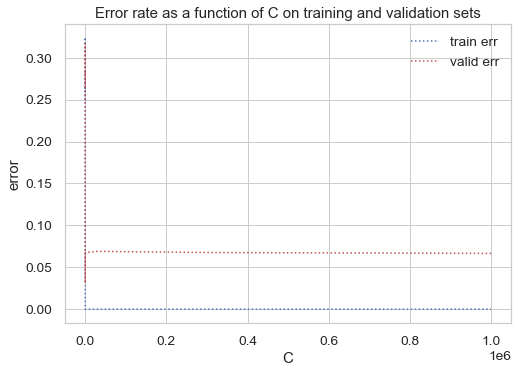

In [46]:
plt.plot(C_grid, tr_err_list_1C, 'b:', label='train err')
plt.plot(C_grid, va_err_list_1C, 'r:', label='valid err')

plt.ylabel('error')
plt.xlabel("C");
#plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
plt.legend()
plt.title('Error rate as a function of C on training and validation sets')
#plt.ylim([0, 0.7]);

In [50]:
idx_best_C__lr_1C = np.argmin(va_err_list_1C)
#print(idx_best_C__lrF2)
best_C__lr_1C= C_grid[idx_best_C__lr_1C]
print(best_C__lr_1C)
print(np.log10(C))

0.01
6.0


### Answer for figure 1c
The hyperparameter C I should select is the one that minimizes the validation error rate, in this case it's C = 0.01.

### BONUS: Figure 1C: Improved figure 1C

I slightly modified the required figure 1c so the plot can be more readable. This does not affect which is the C that minimizes the validation error rate.

Text(0.5, 1.0, 'Error rate as a function of log_{10} C on training and validation sets.')

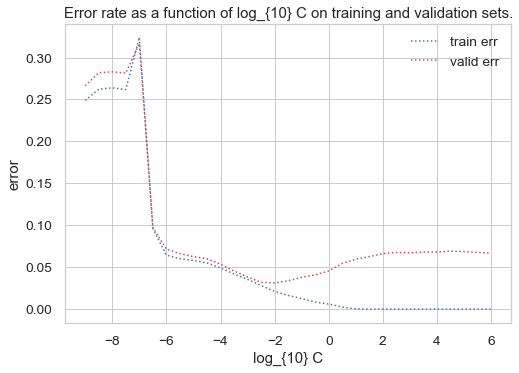

In [49]:
plt.plot(np.log10(C_grid), tr_err_list_1C, 'b:', label='train err')
plt.plot(np.log10(C_grid), va_err_list_1C, 'r:', label='valid err')

plt.ylabel('error')
plt.xlabel("log_{10} C");
#plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
plt.legend()
plt.title('Error rate as a function of log_{10} C on training and validation sets.')
#plt.ylim([0, 0.7]);

## 1D: Analysis of Mistakes

### Figure 1D

### Short Answer 1D

## 1E: Interpretation of Learned Weights

### Figure 1E

### Short Answer 1E